In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import plotly
plotly.offline.init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the file
df = pd.read_csv('state2.csv', delimiter=',')
df.head()

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South
0,26150,46,5,1,0,0,1,0,0,0,0
1,6605,71,1,0,0,0,1,0,0,0,0
2,18548,38,8,0,1,1,0,0,0,0,0
3,47668,54,3,0,1,1,0,0,0,0,0
4,44554,59,9,2,1,0,0,0,0,1,0


In [3]:
print(df.columns)

Index(['income', 'age', 'years_with_bank', 'nbr_children', 'gender_F ',
       'marital_status_1', 'marital_status_2', 'marital_status_3',
       'state_code_Midwest', 'state_code_Northeast', 'state_code_South'],
      dtype='object')


In [4]:
df.head()

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South
0,26150,46,5,1,0,0,1,0,0,0,0
1,6605,71,1,0,0,0,1,0,0,0,0
2,18548,38,8,0,1,1,0,0,0,0,0
3,47668,54,3,0,1,1,0,0,0,0,0
4,44554,59,9,2,1,0,0,0,0,1,0


In [5]:
#scaling
from sklearn.preprocessing import MinMaxScaler
# create a new DataFrame with only the columns to standardize
subset = df[['income', 'age','years_with_bank','nbr_children']]

# instantiate StandardScaler object
scaler = MinMaxScaler()

# fit scaler to data
scaler.fit(subset)


# transform data
subset_transformed = scaler.transform(subset)

# transform data and overwrite original columns
df_scaled=df.copy()
df_scaled[['income', 'age','years_with_bank','nbr_children']] = scaler.transform(subset)

df_scaled['gender_F ']=0.1* df_scaled['gender_F ']
df_scaled['marital_status_1']= 0.1* df_scaled['marital_status_1']
df_scaled['marital_status_2']= 0.1* df_scaled['marital_status_2']
df_scaled['marital_status_3']= 0.1* df_scaled['marital_status_3']
df_scaled['state_code_Midwest']= 0.1* df_scaled['state_code_Midwest']
df_scaled['state_code_Northeast']= 0.1* df_scaled['state_code_Northeast']
df_scaled['state_code_South']= 0.1* df_scaled['state_code_South']

df_scaled.head()

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South
0,0.181399,0.434211,0.555556,0.2,0.0,0.0,0.1,0.0,0.0,0.0,0.0
1,0.045818,0.763158,0.111111,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0
2,0.128665,0.328947,0.888889,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0
3,0.330667,0.539474,0.333333,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0
4,0.309066,0.605263,1.000000,0.4,0.1,0.0,0.0,0.0,0.0,0.1,0.0


In [6]:
#clustering with Kmeans

# identifying ideal number of clusters
# import Kmeans from sklearn
from sklearn.cluster import KMeans

# Calculating inertias

inertias = []
K = range(1,11) #run K-means with K ranging from 1 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    inertias.append(kmeanModel.inertia_)

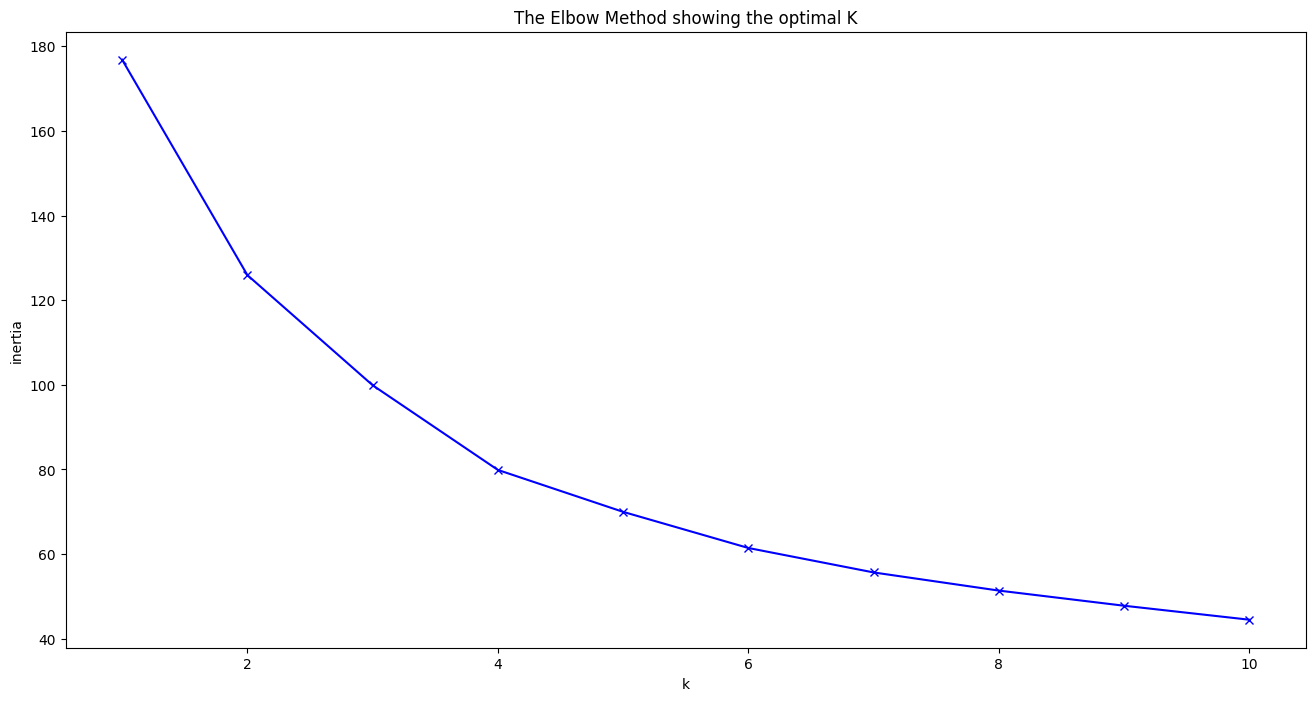

In [7]:
# plot elbow method
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

In [8]:
# silhouette score
from sklearn.metrics import silhouette_score

silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    label=kmeanModel.predict(df_scaled)
    silhouettes.append(silhouette_score(df_scaled,label))

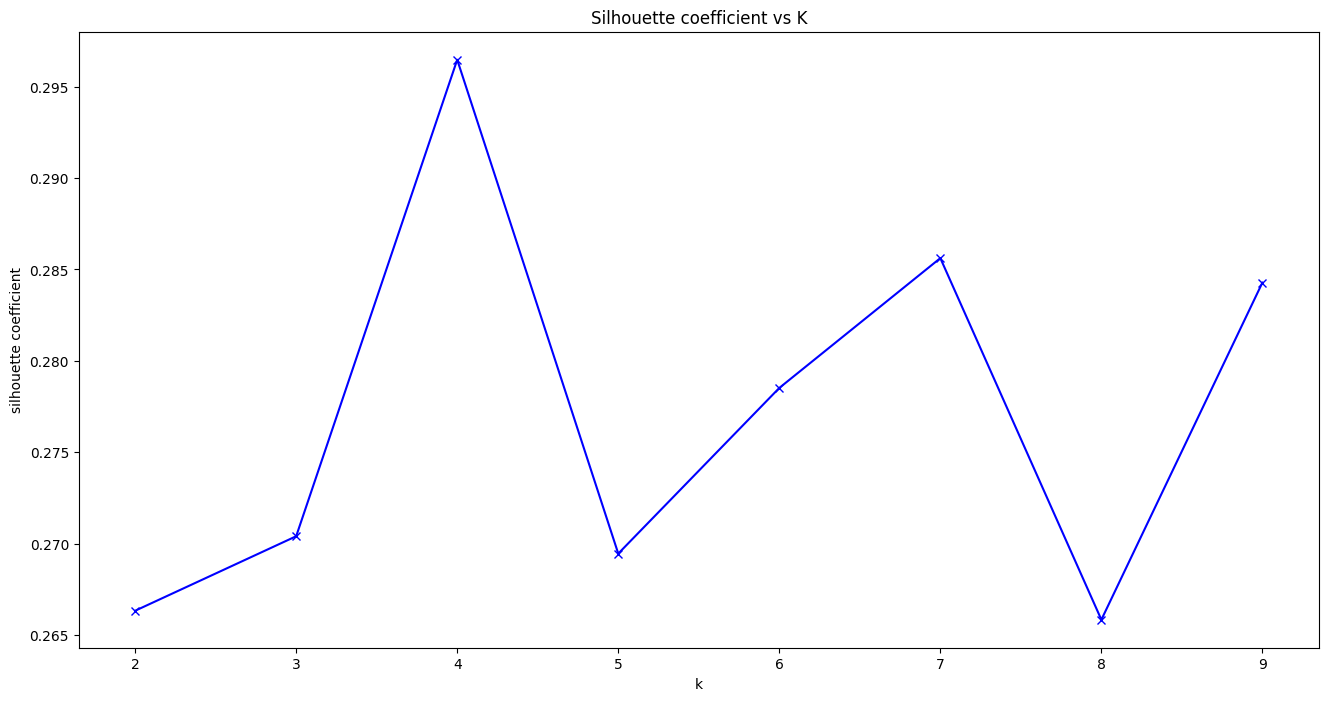

In [9]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

In [10]:
#Kmeans with selected k
km = KMeans(n_clusters=4, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# fit and predict
y_km = km.fit_predict(df_scaled)

In [11]:
y_km

array([3, 2, 3, 2, 3, 1, 0, 3, 1, 3, 3, 0, 2, 0, 1, 0, 2, 0, 3, 0, 2, 2,
       3, 3, 1, 2, 0, 3, 3, 2, 2, 2, 1, 3, 2, 1, 0, 2, 3, 0, 0, 1, 2, 1,
       2, 2, 2, 0, 3, 2, 0, 0, 3, 3, 3, 2, 2, 3, 2, 3, 1, 0, 0, 2, 3, 0,
       3, 1, 0, 0, 2, 1, 3, 2, 3, 3, 0, 2, 0, 3, 2, 3, 2, 0, 3, 1, 2, 2,
       2, 3, 1, 0, 0, 2, 0, 2, 0, 2, 2, 1, 3, 3, 1, 2, 1, 2, 3, 3, 3, 3,
       0, 3, 3, 2, 1, 3, 1, 2, 3, 1, 2, 1, 3, 1, 0, 3, 0, 2, 1, 0, 3, 2,
       0, 2, 3, 0, 3, 3, 0, 2, 3, 3, 3, 0, 3, 0, 3, 3, 2, 1, 0, 2, 2, 2,
       2, 3, 0, 3, 1, 3, 3, 3, 3, 1, 1, 1, 2, 0, 2, 3, 2, 3, 3, 2, 2, 0,
       3, 3, 3, 2, 3, 0, 3, 0, 3, 2, 2, 1, 3, 1, 2, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 3, 3, 0, 0, 2, 3, 0, 2, 0, 3, 0, 0, 3, 3, 0, 1, 0, 1, 2, 1,
       3, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 3, 1, 0,
       2, 3, 2, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 2, 2, 2, 1, 3, 1, 1,
       0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 3, 1, 2, 2, 2, 0, 0, 3, 3, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 2, 3, 0, 2, 3, 0, 0, 0,

In [12]:
#adding a columns with labels-clusters to dfscaled
df_scaled_with_clusters =df_scaled.copy()
df_scaled_with_clusters['label']=y_km
df_scaled_with_clusters.head()

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South,label
0,0.181399,0.434211,0.555556,0.2,0.0,0.0,0.1,0.0,0.0,0.0,0.0,3
1,0.045818,0.763158,0.111111,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,2
2,0.128665,0.328947,0.888889,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,3
3,0.330667,0.539474,0.333333,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,2
4,0.309066,0.605263,1.000000,0.4,0.1,0.0,0.0,0.0,0.0,0.1,0.0,3


In [13]:
# countings pts by clusters
df_scaled_with_clusters['label'].value_counts()

label
3    212
0    202
2    188
1    145
Name: count, dtype: int64

In [14]:
#adding a columns with labels-clusters to original df
df_with_clusters =df.copy()
df_with_clusters['label']=y_km
df_with_clusters.head()

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South,label
0,26150,46,5,1,0,0,1,0,0,0,0,3
1,6605,71,1,0,0,0,1,0,0,0,0,2
2,18548,38,8,0,1,1,0,0,0,0,0,3
3,47668,54,3,0,1,1,0,0,0,0,0,2
4,44554,59,9,2,1,0,0,0,0,1,0,3


In [15]:
# calculating the means by clusters
cluster_0_means = df[df_scaled_with_clusters['label']==0].mean()
cluster_1_means = df[df_scaled_with_clusters['label']==1].mean()
cluster_2_means = df[df_scaled_with_clusters['label']==2].mean()
cluster_3_means = df[df_scaled_with_clusters['label']==3].mean()

means= pd.DataFrame([cluster_0_means,cluster_1_means,cluster_2_means,cluster_3_means])
means

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South
0,6684.148515,19.504950,3.287129,0.094059,0.564356,0.836634,0.123762,0.014851,0.202970,0.188119,0.252475
1,31925.317241,38.220690,2.924138,2.537931,0.565517,0.000000,0.655172,0.144828,0.213793,0.186207,0.248276
2,26749.351064,55.994681,1.877660,0.212766,0.558511,0.281915,0.579787,0.058511,0.202128,0.218085,0.239362
3,28159.334906,55.297170,6.971698,0.504717,0.551887,0.254717,0.584906,0.061321,0.212264,0.198113,0.240566


In [16]:
# calculating the means for scaled data
cluster_0_means = df_scaled_with_clusters[df_scaled_with_clusters['label']==0].mean()
cluster_1_means = df_scaled_with_clusters[df_scaled_with_clusters['label']==1].mean()
cluster_2_means = df_scaled_with_clusters[df_scaled_with_clusters['label']==2].mean()
cluster_3_means = df_scaled_with_clusters[df_scaled_with_clusters['label']==3].mean()

means= pd.DataFrame([cluster_0_means,cluster_1_means,cluster_2_means,cluster_3_means])
means=means.drop('label',axis=1)
means

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South
0,0.046367,0.085591,0.365237,0.018812,0.056436,0.083663,0.012376,0.001485,0.020297,0.018812,0.025248
1,0.221462,0.331851,0.324904,0.507586,0.056552,0.000000,0.065517,0.014483,0.021379,0.018621,0.024828
2,0.185557,0.565719,0.208629,0.042553,0.055851,0.028191,0.057979,0.005851,0.020213,0.021809,0.023936
3,0.195338,0.556542,0.774633,0.100943,0.055189,0.025472,0.058491,0.006132,0.021226,0.019811,0.024057


In [17]:
# radar plot for Kmeans
import plotly.graph_objects as go


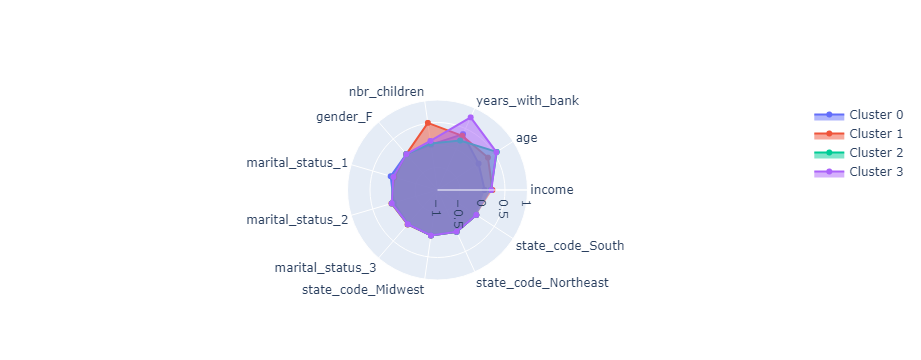

In [18]:

features = list(means.columns)

fig = go.Figure()

clusters=[0,1,2,3]

for c in clusters:
    fig.add_trace(go.Scatterpolar(
          r=list(means.loc[c]),
          theta=features,
          fill='toself',
          name='Cluster '+str(c)
    ))

fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[-1, 1]
        )),
      showlegend=True
    )

fig.show()

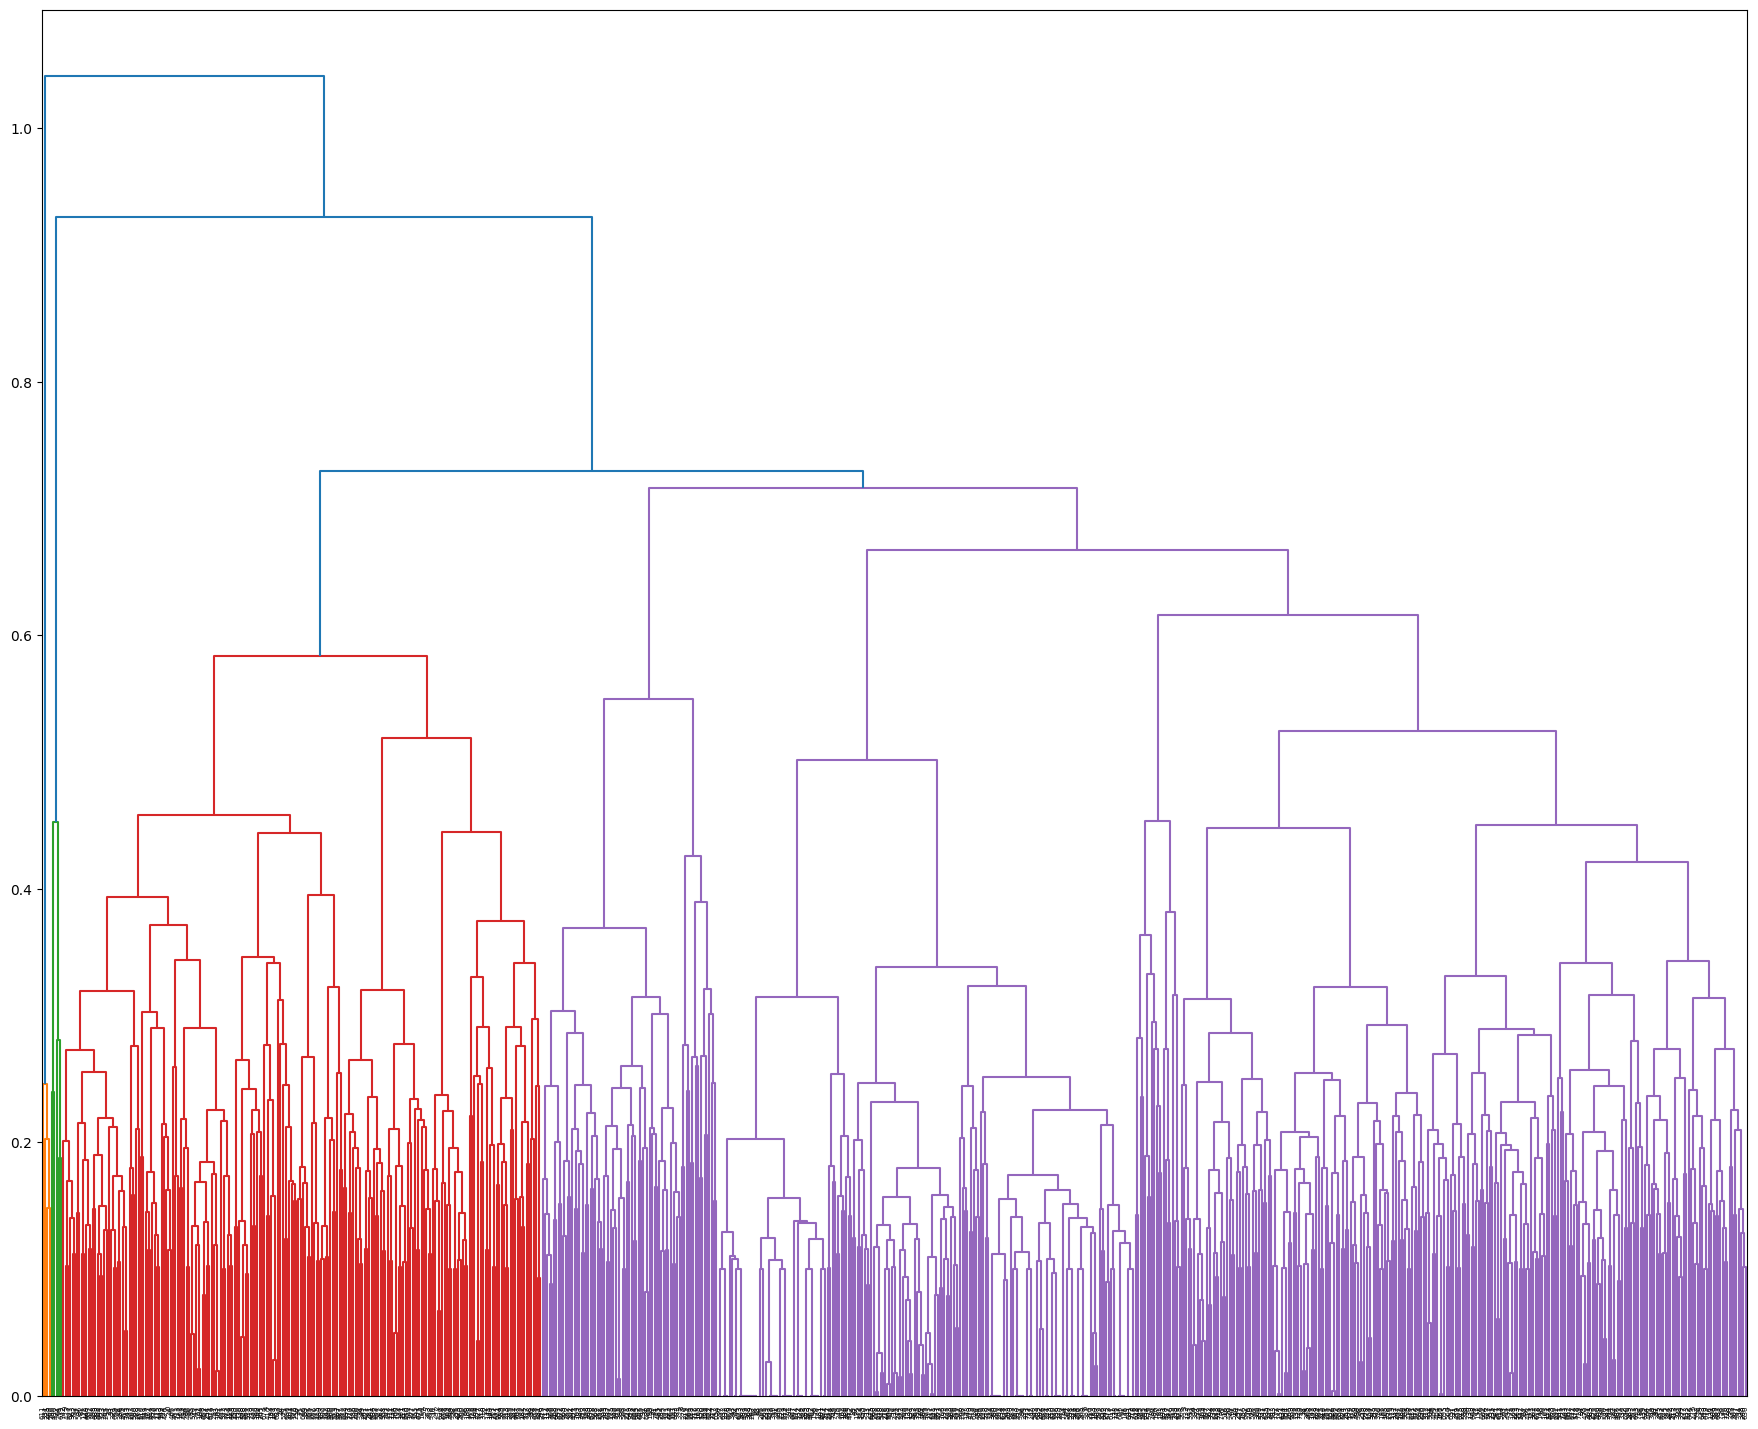

In [19]:
# Hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_type = 'average' 

linkage_matrix = linkage(df_scaled, linkage_type)

plt.figure(figsize=(22,18))
dendrogram(linkage_matrix) # plot using 'dendrogram()'

plt.show()

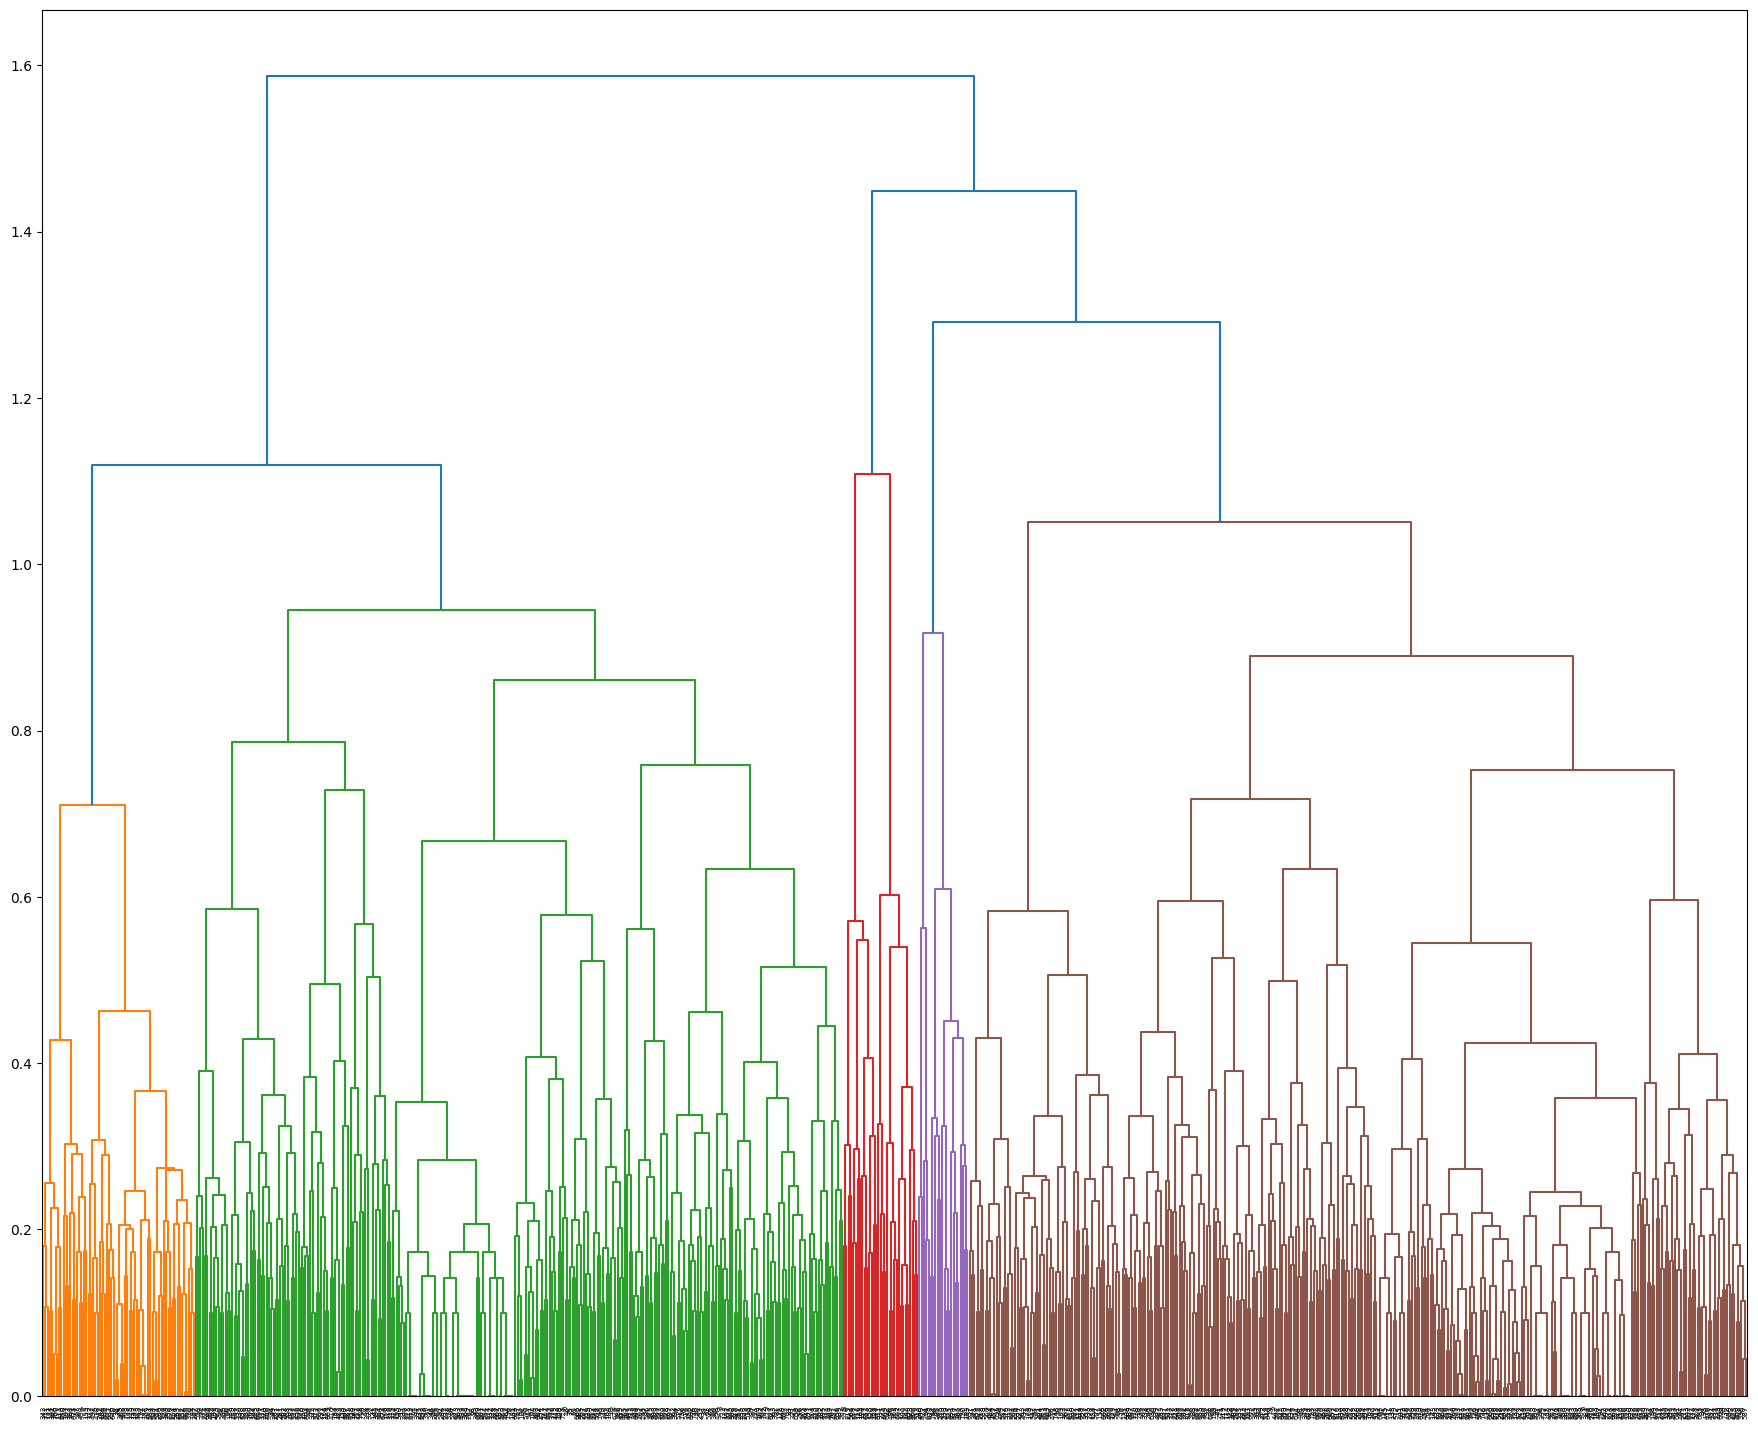

In [20]:
# Hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_type = 'complete' 

linkage_matrix = linkage(df_scaled, linkage_type)

plt.figure(figsize=(22,18))
dendrogram(linkage_matrix) # plot using 'dendrogram()'

plt.show()

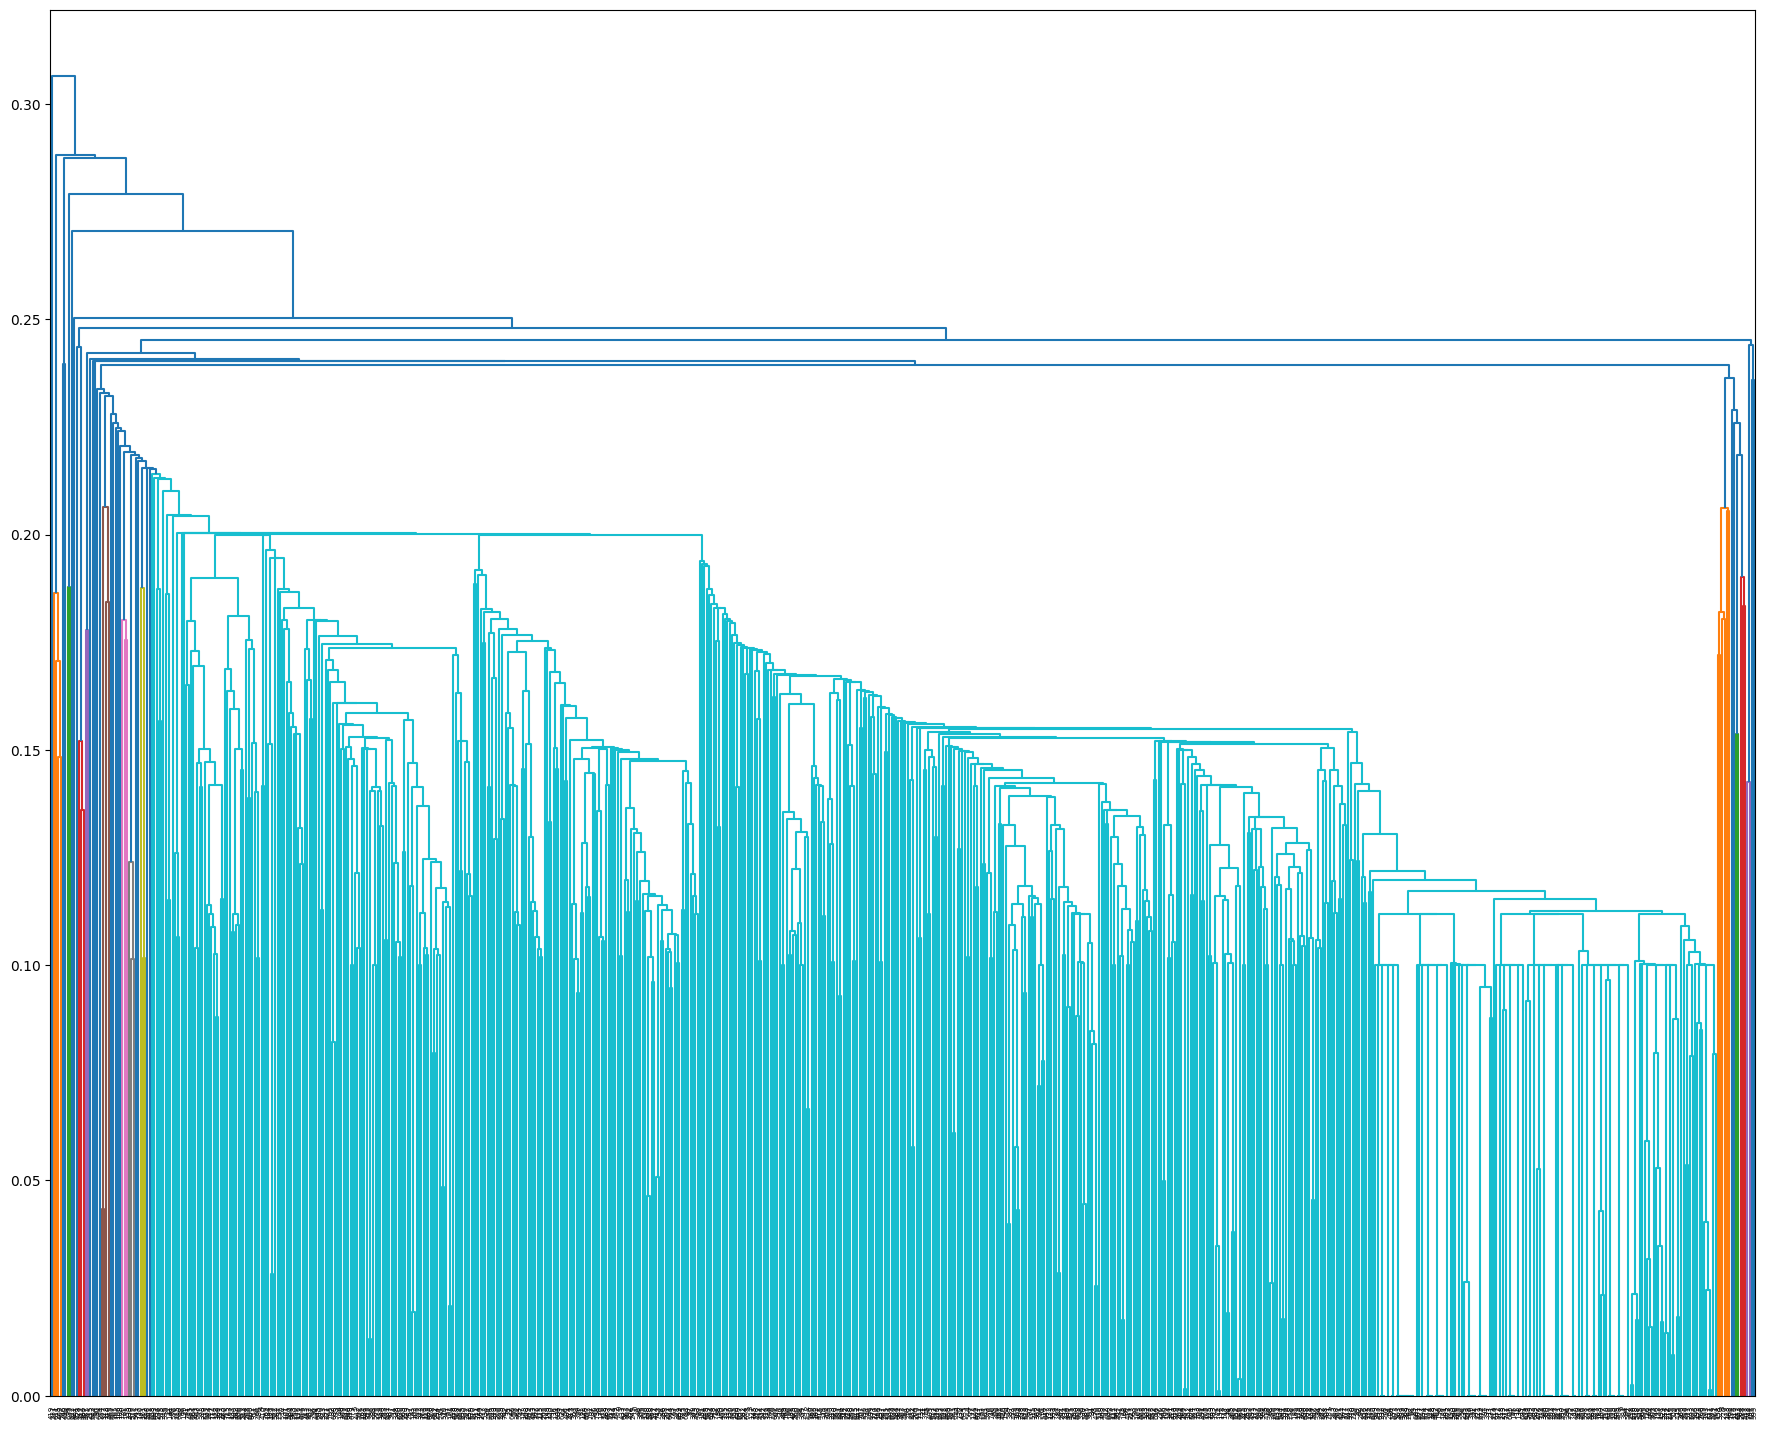

In [21]:
# Hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_type = 'single' 

linkage_matrix = linkage(df_scaled, linkage_type)

plt.figure(figsize=(22,18))
dendrogram(linkage_matrix) # plot using 'dendrogram()'

plt.show()

In [22]:
# calculating silhouette score for every type
from sklearn.cluster import AgglomerativeClustering
# single
single = AgglomerativeClustering(n_clusters=2, linkage="single")
single_pred = single.fit_predict(df_scaled)

# complete
complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
complete_pred = complete.fit_predict(df_scaled)

# average
avg = AgglomerativeClustering(n_clusters=3, linkage="average")
avg_pred = avg.fit_predict(df_scaled)

In [23]:
# comparing the 3 linkage using silhouette score
single_silhouette = silhouette_score(df_scaled, single_pred)
complete_silhouette = silhouette_score(df_scaled, complete_pred)
avg_silhouette = silhouette_score(df_scaled, avg_pred)

print( "Scores: \nSingle:", single_silhouette,"\nComplete: ", complete_silhouette, "\nAverage: ", avg_silhouette)

Scores: 
Single: 0.20078828018759548 
Complete:  0.24060020386575687 
Average:  0.2634461569906165


In [24]:
# looking y- pred (clusters)
complete_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 2, 0, 0, 1, 1, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 2, 0, 0,
       1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,

In [25]:
# adding columns with new clustering to df
df2_with_clusters =df_scaled.copy()
df2_with_clusters['label']=complete_pred
df2_with_clusters.head()

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South,label
0,0.181399,0.434211,0.555556,0.2,0.0,0.0,0.1,0.0,0.0,0.0,0.0,1
1,0.045818,0.763158,0.111111,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0
2,0.128665,0.328947,0.888889,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,1
3,0.330667,0.539474,0.333333,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,1
4,0.309066,0.605263,1.000000,0.4,0.1,0.0,0.0,0.0,0.0,0.1,0.0,1


In [26]:
# calculating the means
cluster_0_means = df2_with_clusters[df2_with_clusters['label']==0].mean()
cluster_1_means = df2_with_clusters[df2_with_clusters['label']==1].mean()
cluster_2_means = df2_with_clusters[df2_with_clusters['label']==2].mean()
means2= pd.DataFrame([cluster_0_means,cluster_1_means,cluster_2_means])
means2=means2.drop('label',axis=1)
means2

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South
0,0.151415,0.330325,0.186103,0.134435,0.056474,0.039945,0.044353,0.007438,0.025069,0.020661,0.023140
1,0.155248,0.448643,0.681861,0.092308,0.055840,0.037322,0.049288,0.005128,0.017094,0.019943,0.026496
2,0.252084,0.374801,0.528620,0.775758,0.051515,0.000000,0.057576,0.009091,0.012121,0.009091,0.018182


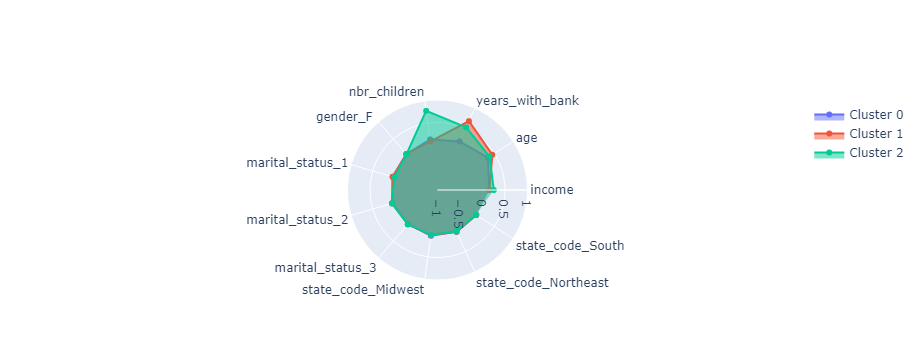

In [27]:
# radar plot for Hierchical clustering
features = list(means2.columns)

fig = go.Figure()

clusters=[0,1,2]

for c in clusters:
    fig.add_trace(go.Scatterpolar(
          r=list(means2.loc[c]),
          theta=features,
          fill='toself',
          name='Cluster '+str(c)
    ))

fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[-1, 1]
        )),
      showlegend=True
    )

fig.show()

In [28]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs

In [29]:
##### Compute DBSCAN
db = DBSCAN(eps=0.2, min_samples=10)
db.fit(df_scaled) #algorithm runs

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
#core_samples_mask will be True if the data point was a core point. Otherwise false.

labels = db.labels_
#actual cluster label. If outliers, gets assigned -1

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) #number of unique clusters labels (excluding -1)
n_noise_ = list(labels).count(-1) #counts how many outliers there are (labels with -1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)





Estimated number of clusters: 4
Estimated number of noise points: 177


In [30]:
#adding a column with DBSCAN clustering to scaled df
df3_with_clusters =df_scaled.copy()
df3_with_clusters['label']=labels
df3_with_clusters.head()

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South,label
0,0.181399,0.434211,0.555556,0.2,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0
1,0.045818,0.763158,0.111111,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,1
2,0.128665,0.328947,0.888889,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,1
3,0.330667,0.539474,0.333333,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,1
4,0.309066,0.605263,1.000000,0.4,0.1,0.0,0.0,0.0,0.0,0.1,0.0,-1


In [31]:
# calculating the mean
cluster_0_means = df3_with_clusters[df3_with_clusters['label']==0].mean()
cluster_1_means = df3_with_clusters[df3_with_clusters['label']==1].mean()
cluster_2_means = df3_with_clusters[df3_with_clusters['label']==2].mean()
cluster_3_means = df3_with_clusters[df3_with_clusters['label']==3].mean()

means3= pd.DataFrame([cluster_0_means,cluster_1_means,cluster_2_means,cluster_3_means])
means3=means3.drop('label',axis=1)
means3

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South
0,0.195634,0.501907,0.484702,0.2,0.057971,0.000000,0.081159,0.002899,0.017391,0.018841,0.018841
1,0.091893,0.385061,0.421806,0.0,0.057845,0.061593,0.032319,0.002576,0.021546,0.020141,0.023653
2,0.158573,0.320107,0.354167,0.4,0.067187,0.000000,0.078125,0.007812,0.021875,0.025000,0.026562
3,0.120857,0.265789,0.244444,0.6,0.070000,0.000000,0.090000,0.010000,0.030000,0.010000,0.000000


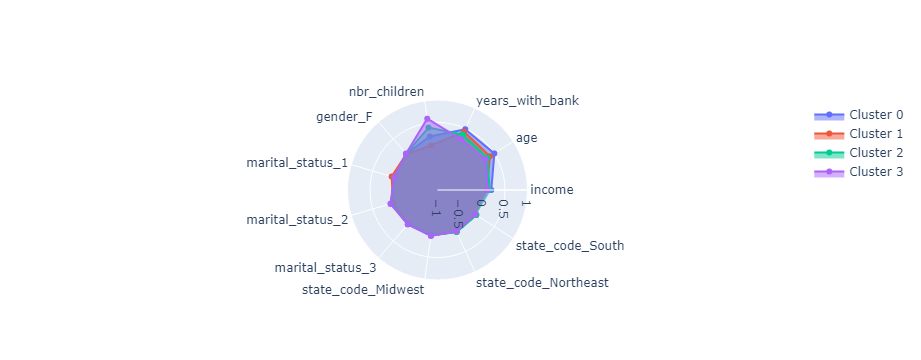

In [32]:
#Radar plot for DBSCAN
features = list(means3.columns)

fig = go.Figure()

clusters=[0,1,2,3]

for c in clusters:
    fig.add_trace(go.Scatterpolar(
          r=list(means3.loc[c]),
          theta=features,
          fill='toself',
          name='Cluster '+str(c)
    ))

fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[-1, 1]
        )),
      showlegend=True
    )

fig.show()

In [33]:
#Using PCA for visulization

from sklearn.decomposition import PCA

pca = PCA(n_components=None)

dfx_pca = pca.fit(df_scaled)


In [34]:
# calculating explained variance

explained_variance= np.insert(pca.explained_variance_ratio_,0,0)

In [35]:
# preparing the cumulative variance
cumulative_variance=np.cumsum(np.round(explained_variance, decimals=3))

In [36]:
pc_df=pd.DataFrame(['','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'], columns=['PC'])
explained_variance_df= pd.DataFrame(explained_variance,columns=['Explained Variance'])
cumulative_variance_df= pd.DataFrame(cumulative_variance,columns=['Cumulative Variance'])
df_explained_variance= pd.concat([pc_df,explained_variance_df,cumulative_variance_df],axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.401085,0.401
2,PC2,0.253763,0.655
3,PC3,0.221499,0.876
4,PC4,0.077578,0.954
5,PC5,0.010701,0.965
6,PC6,0.009986,0.975
7,PC7,0.009356,0.984
8,PC8,0.008547,0.993
9,PC9,0.003441,0.996


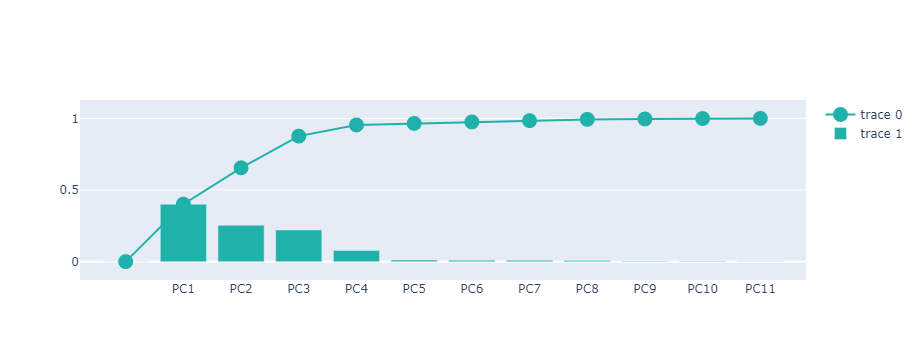

In [37]:
#ploting variance and cumulative
import plotly.graph_objects as go
fig=go.Figure()
fig.add_trace(
    go.Scatter(
        x= df_explained_variance['PC'],
        y= df_explained_variance['Cumulative Variance'],
        marker=dict(size=15, color="lightSeaGreen")
    ))
fig.add_trace(
    go.Bar(
        x = df_explained_variance['PC'],
        y = df_explained_variance['Explained Variance'],
        marker=dict(color="lightSeaGreen")
    ))
fig.show()

In [38]:
# getting the 4 PCA components

pca=PCA(n_components=4).set_output(transform="pandas")
df_pca = pca.fit_transform(df_scaled)
df_pca.head()

,pca0,pca1,pca2,pca3
0,0.130604,0.009950,0.071393,-0.005915
1,-0.130305,0.419346,-0.259117,-0.141622
2,0.386452,-0.277985,-0.089022,0.033923
3,-0.010009,0.184334,-0.132513,0.174109
4,0.598296,0.017089,0.305124,0.019181


In [39]:
# using clustering for kmeans
df_pca_with_clusters = df_pca.copy()
df_pca_with_clusters['label'] = df_scaled_with_clusters['label']
df_pca_with_clusters.head()

,pca0,pca1,pca2,pca3,label
0,0.130604,0.009950,0.071393,-0.005915,3
1,-0.130305,0.419346,-0.259117,-0.141622,2
2,0.386452,-0.277985,-0.089022,0.033923,3
3,-0.010009,0.184334,-0.132513,0.174109,2
4,0.598296,0.017089,0.305124,0.019181,3


In [40]:
# to visualize centroids in PCA space
pca_centroids = pca.transform(km.cluster_centers_)
pca_centroids

,pca0,pca1,pca2,pca3
0,-0.194113,-0.279944,-0.106305,0.000416
1,-0.134735,0.064884,0.360057,-0.042826
2,-0.120092,0.242685,-0.141149,0.017014
3,0.383607,0.007149,-0.019805,0.013807


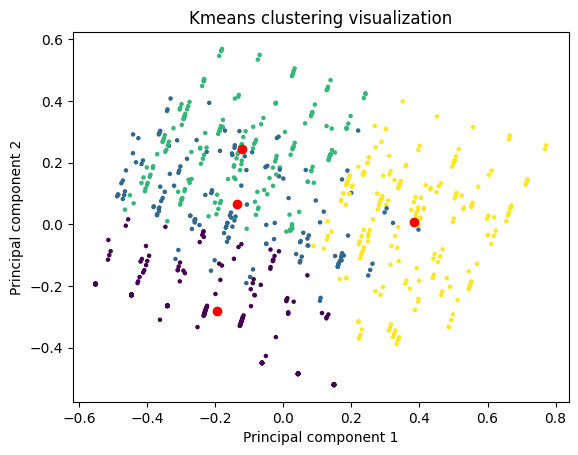

In [41]:
# visualazing Kmeans in PCA1 & PCA2
plt.scatter(df_pca_with_clusters['pca0'],df_pca_with_clusters['pca1'], c=df_pca_with_clusters['label'], s=5)
plt.scatter(pca_centroids['pca0'],pca_centroids['pca1'], c='red')
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title("Kmeans clustering visualization")

plt.show()

In [42]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# generate clusters 
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  random_state=0)


def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()

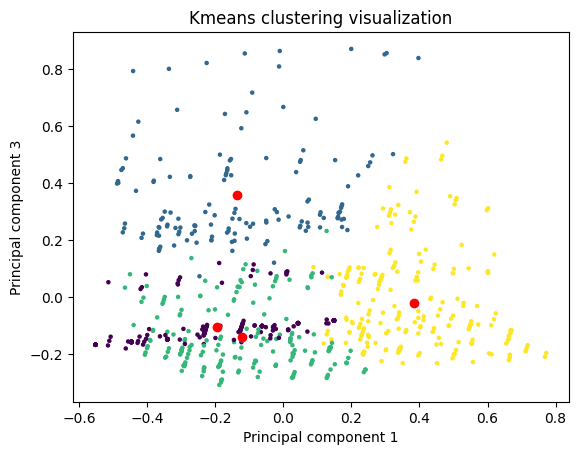

In [43]:
# visualazing Kmeans in PCA1 & PCA2
plt.scatter(df_pca_with_clusters['pca0'],df_pca_with_clusters['pca2'], c=df_pca_with_clusters['label'], s=5)
plt.scatter(pca_centroids['pca0'],pca_centroids['pca2'], c='red')
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 3")
plt.title("Kmeans clustering visualization")
plt.show()

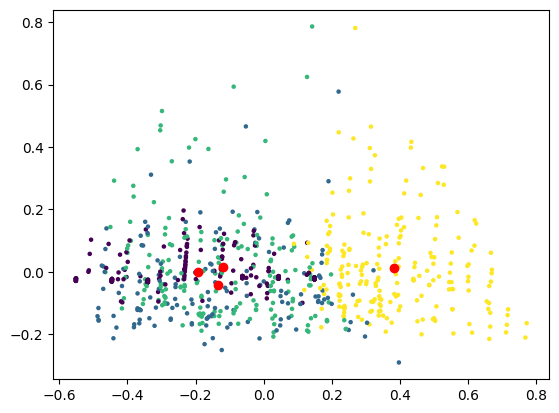

In [44]:
# visualazing Kmeans in PCA1 & PCA3
plt.scatter(df_pca_with_clusters['pca0'],df_pca_with_clusters['pca3'], c=df_pca_with_clusters['label'], s=5)
plt.scatter(pca_centroids['pca0'],pca_centroids['pca3'], c='red')
plt.show()

In [45]:
# function to show every x steps of kmeans
def steps(x):
    km = KMeans(n_clusters=4, # how many clusters we expected 
                n_init=x, # how many initial runs
                random_state=0)

    # fit and predict
    y_km = km.fit_predict(df_scaled)
    
   # finding PCA

    pca = PCA(n_components=None)

    dfx_pca = pca.fit(df_scaled)
    pca=PCA(n_components=4).set_output(transform="pandas")
    df_pca = pca.fit_transform(df_scaled)
    df_pca_with_clusters = df_pca.copy()
    df_pca_with_clusters['label'] = df_scaled_with_clusters['label']
    pca_centroids = pca.transform(km.cluster_centers_)
    plt.scatter(df_pca_with_clusters['pca0'],df_pca_with_clusters['pca1'], c=df_pca_with_clusters['label'], s=5)
    plt.scatter(pca_centroids['pca0'],pca_centroids['pca1'], c='red')
    plt.show()

step 1


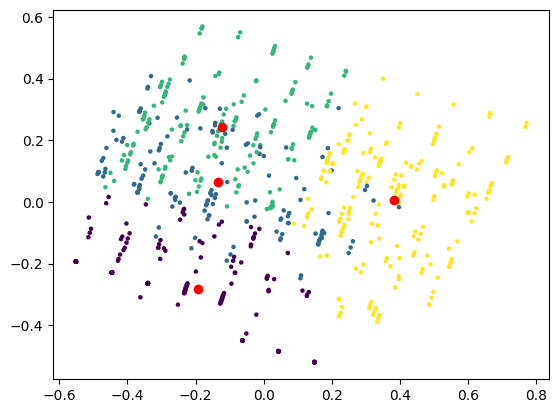

step 2


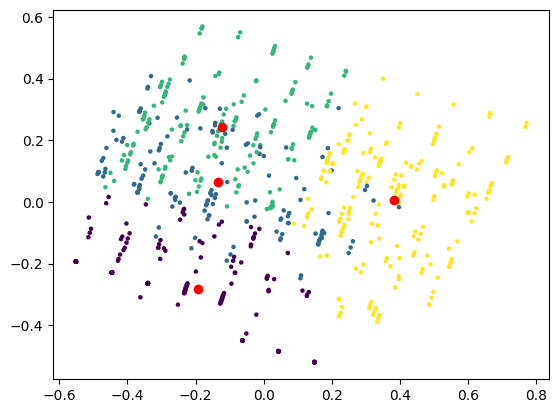

step 3


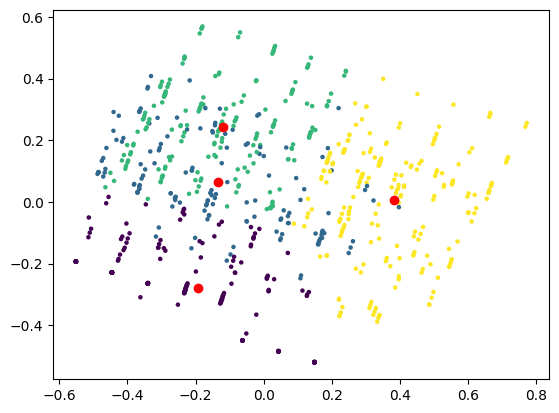

step 4


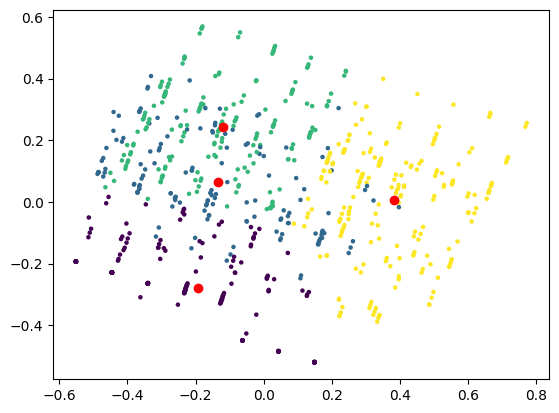

step 5


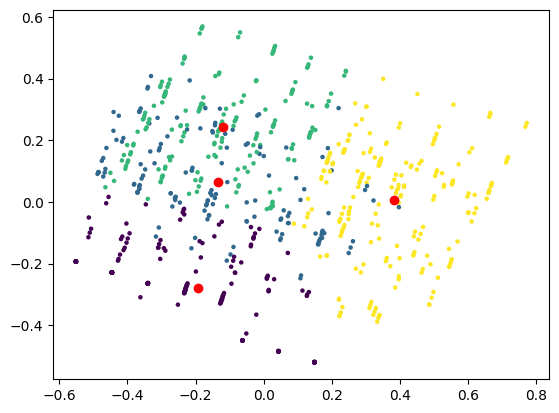

step 6


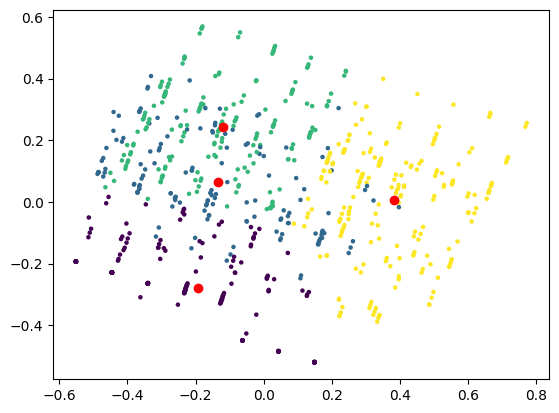

step 7


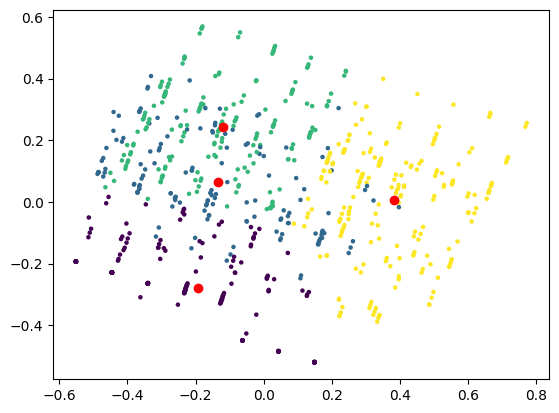

step 8


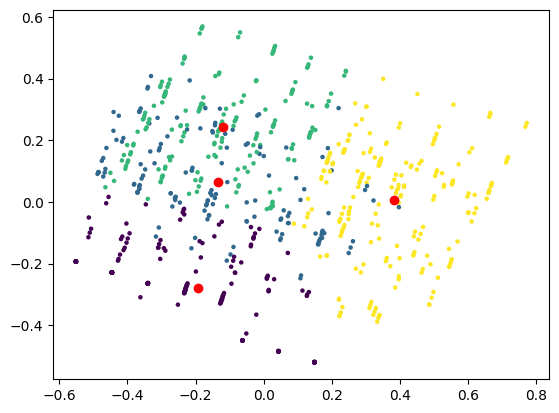

step 9


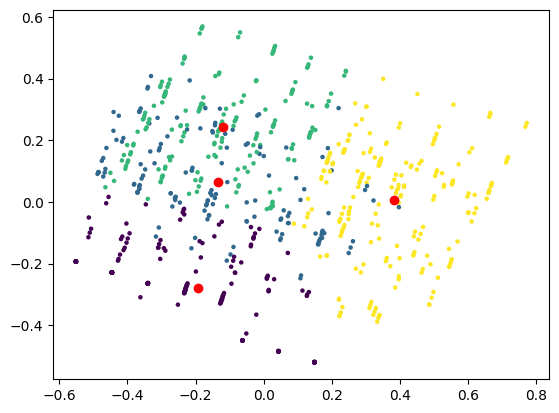

step 10


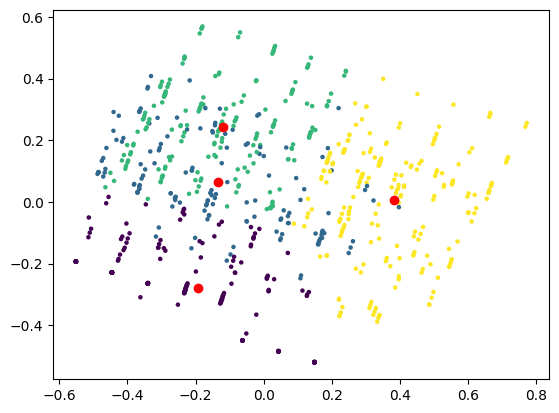

In [46]:
# steps 1 to 10
for i in range(1,11):
    print( f'step {i}')
    steps(i)

In [48]:
#df with all PCA components

pca=PCA(n_components=11).set_output(transform="pandas")
df_pca1 = pca.fit_transform(df_scaled)
df_pca1.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,0.130604,0.009950,0.071393,-0.005915,0.074489,-0.002114,-0.008023,0.007487,-0.011207,0.036612,-0.002881
1,-0.130305,0.419346,-0.259117,-0.141622,0.063280,0.019854,-0.019040,0.006364,-0.015127,0.042534,-0.005381
2,0.386452,-0.277985,-0.089022,0.033923,-0.062627,-0.007114,-0.003844,-0.000499,-0.027373,0.025877,-0.004983
3,-0.010009,0.184334,-0.132513,0.174109,-0.089934,0.004156,-0.010320,-0.003039,-0.046712,0.026711,-0.007991
4,0.598296,0.017089,0.305124,0.019181,-0.091561,-0.017374,-0.035515,0.072967,0.016704,-0.022803,0.040510


In [49]:
#Kmeans using Df-PCA
# import Kmeans from sklearn
from sklearn.cluster import KMeans


inertias = []
K = range(1,11) #run K-means with K ranging from 1 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_pca1)
    inertias.append(kmeanModel.inertia_)
    

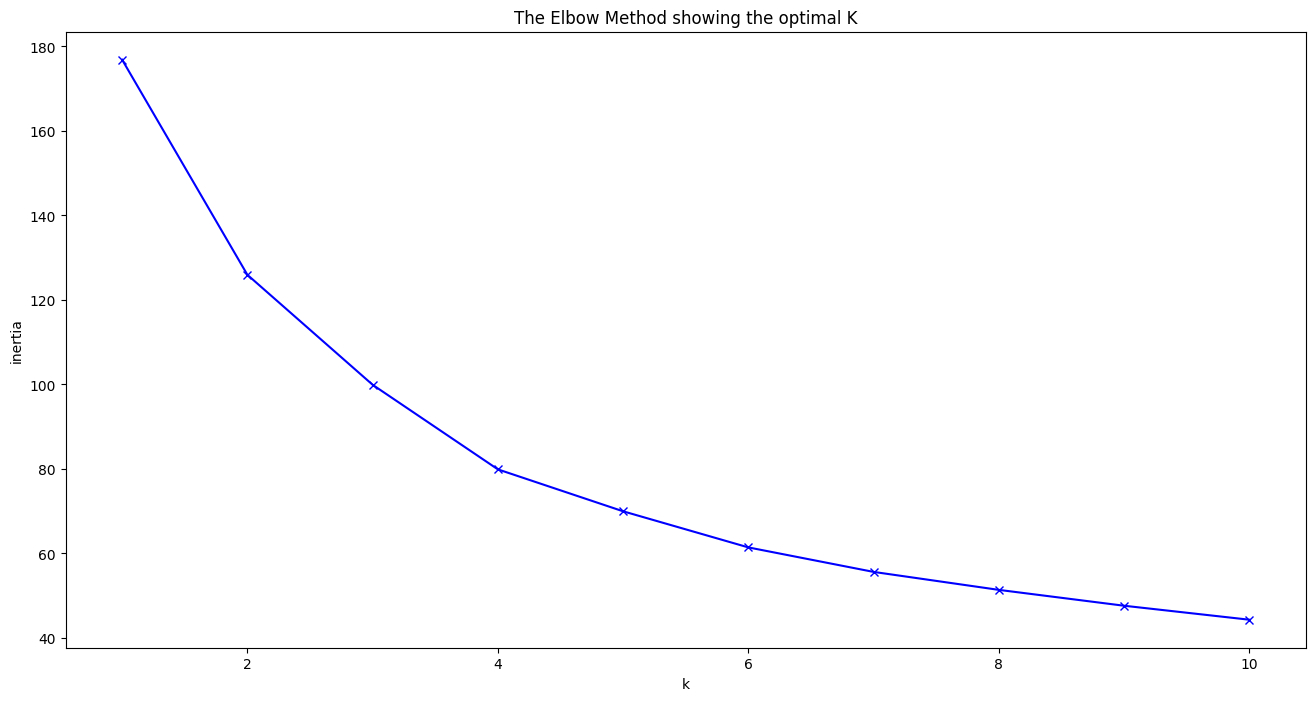

In [50]:
# plot elbow method
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

In [51]:
from sklearn.metrics import silhouette_score

silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_pca1)
    label=kmeanModel.predict(df_pca1)
    silhouettes.append(silhouette_score(df_pca,label))

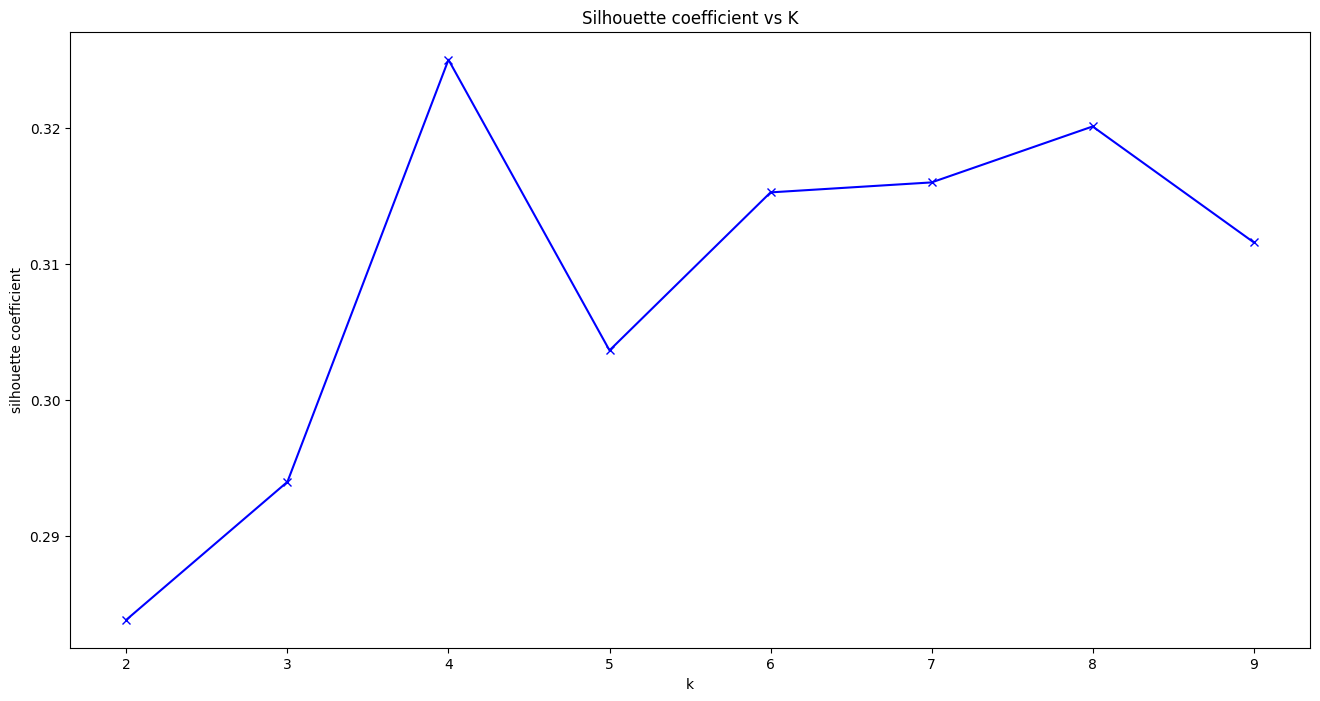

In [52]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

In [53]:
km = KMeans(n_clusters=4, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# fit and predict
y_km1 = km.fit_predict(df_pca1)

In [54]:
y_km1

array([3, 2, 3, 2, 3, 1, 0, 3, 1, 3, 3, 0, 2, 0, 1, 0, 2, 0, 3, 0, 2, 2,
       3, 3, 1, 2, 0, 3, 3, 2, 2, 2, 1, 3, 2, 1, 0, 2, 3, 0, 0, 1, 2, 1,
       2, 2, 2, 0, 3, 2, 0, 0, 3, 3, 3, 2, 2, 3, 2, 3, 1, 0, 0, 2, 3, 0,
       3, 1, 0, 0, 2, 1, 3, 2, 3, 3, 0, 2, 0, 3, 2, 3, 2, 0, 3, 1, 2, 2,
       2, 3, 1, 0, 0, 2, 0, 2, 0, 2, 2, 1, 3, 3, 1, 2, 1, 2, 3, 3, 3, 3,
       0, 3, 3, 2, 1, 3, 1, 2, 3, 1, 2, 1, 3, 1, 0, 3, 0, 2, 1, 0, 3, 2,
       0, 2, 3, 0, 3, 3, 0, 2, 3, 3, 3, 0, 3, 0, 3, 3, 2, 1, 0, 2, 2, 2,
       2, 3, 0, 3, 1, 3, 3, 3, 3, 1, 1, 1, 2, 0, 2, 3, 2, 3, 3, 2, 2, 0,
       3, 3, 3, 2, 3, 0, 3, 0, 3, 2, 2, 1, 3, 1, 2, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 3, 3, 0, 0, 2, 3, 0, 2, 0, 3, 0, 0, 3, 3, 0, 1, 0, 1, 2, 1,
       3, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 3, 1, 0,
       2, 3, 2, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 2, 2, 2, 1, 3, 1, 1,
       0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 3, 1, 2, 2, 2, 0, 0, 3, 3, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 2, 3, 0, 2, 3, 0, 0, 0,

In [55]:
df_pca1_with_clusters =df_pca1.copy()
df_pca1_with_clusters['label']=y_km1
df_pca1_with_clusters.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,label
0,0.130604,0.009950,0.071393,-0.005915,0.074489,-0.002114,-0.008023,0.007487,-0.011207,0.036612,-0.002881,3
1,-0.130305,0.419346,-0.259117,-0.141622,0.063280,0.019854,-0.019040,0.006364,-0.015127,0.042534,-0.005381,2
2,0.386452,-0.277985,-0.089022,0.033923,-0.062627,-0.007114,-0.003844,-0.000499,-0.027373,0.025877,-0.004983,3
3,-0.010009,0.184334,-0.132513,0.174109,-0.089934,0.004156,-0.010320,-0.003039,-0.046712,0.026711,-0.007991,2
4,0.598296,0.017089,0.305124,0.019181,-0.091561,-0.017374,-0.035515,0.072967,0.016704,-0.022803,0.040510,3


In [56]:
cluster_0_means = df_pca1[df_pca1_with_clusters['label']==0].mean()
cluster_1_means = df_pca1[df_pca1_with_clusters['label']==1].mean()
cluster_2_means = df_pca1[df_pca1_with_clusters['label']==2].mean()
cluster_3_means = df_pca1[df_pca1_with_clusters['label']==3].mean()
# cluster_4_means = df_pca1[df_pca1_with_clusters['label']==4].mean()
means4= pd.DataFrame([cluster_0_means,cluster_1_means,cluster_2_means,cluster_3_means])
means4

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,-0.194113,-0.279944,-0.106305,0.000416,0.002035,0.001217,-0.001242,-0.001841,0.000296,-0.001543,0.000187
1,-0.134735,0.064884,0.360057,-0.042826,-0.002473,0.001036,-0.000575,-0.001327,0.001972,-0.002801,-0.001067
2,-0.120092,0.242685,-0.141149,0.017014,-0.000220,0.000468,0.002427,0.001412,-0.002630,0.003414,-0.000320
3,0.383607,0.007149,-0.019805,0.013807,-0.000052,-0.002283,-0.000576,0.001409,0.000701,0.000359,0.000835


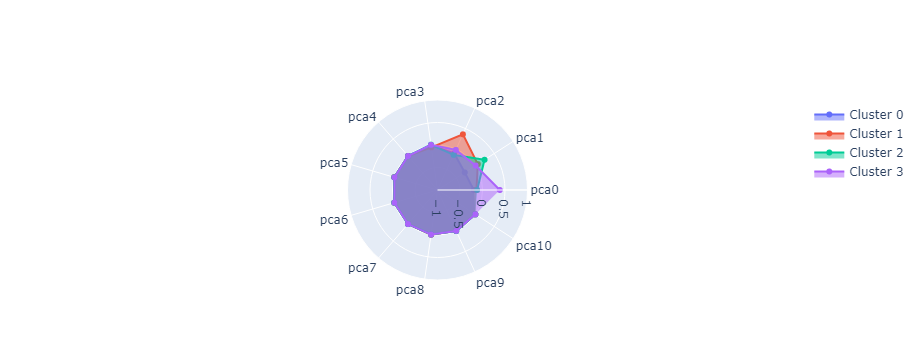

In [57]:
features = list(means4.columns)

fig = go.Figure()

clusters=[0,1,2,3]

for c in clusters:
    fig.add_trace(go.Scatterpolar(
          r=list(means4.loc[c]),
          theta=features,
          fill='toself',
          name='Cluster '+str(c)
    ))

fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[-1, 1]
        )),
      showlegend=True
    )

fig.show()

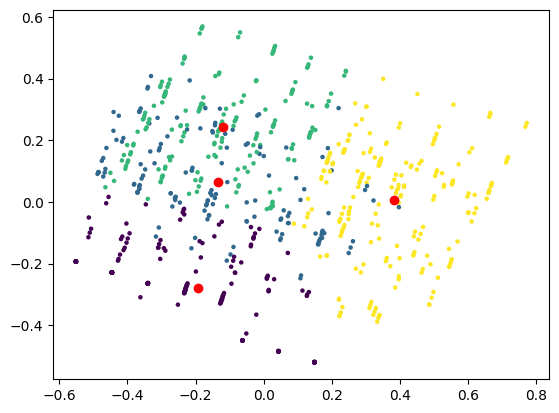

In [58]:

    plt.scatter(df_pca1_with_clusters['pca0'],df_pca1_with_clusters['pca1'], c=df_pca1_with_clusters['label'], s=5)
    plt.scatter(pca_centroids['pca0'],pca_centroids['pca1'], c='red')
    plt.show()